## t-tests

In [1]:
import pandas as pd
solar_data = pd.read_csv('data/solar_cell_efficiencies.csv')

In [2]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187196 entries, 0 to 187195
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   efficiency  187196 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [3]:
solar_data.describe()

,efficiency
count,187196.000000
mean,14.181805
std,0.488751
min,9.691218
25%,13.932445
50%,14.205567
75%,14.482341
max,17.578530


In [4]:
solar_data['efficiency'].mean()

14.181805365742568

In [5]:
# if you are not able to use the 'alternative' argument, check your scipy version and possibly upgrade
import scipy
scipy.__version__

'1.6.0'

In [6]:
from scipy.stats import ttest_1samp

In [7]:
ttest_1samp(solar_data['efficiency'], 14, alternative='two-sided')

Ttest_1sampResult(statistic=160.9411176293201, pvalue=0.0)

In [8]:
sample = solar_data['efficiency'].sample(30, random_state=1)
print(sample.mean())
ttest_1samp(sample, 14)

14.100587953561668


Ttest_1sampResult(statistic=1.2215589926015267, pvalue=0.2317121281215101)

In [9]:
from statsmodels.stats.weightstats import ztest

In [10]:
ztest(solar_data['efficiency'], value=14)

(160.9411176293201, 0.0)

In [11]:
ttest_1samp(solar_data['efficiency'], 14, alternative='greater')

Ttest_1sampResult(statistic=160.9411176293201, pvalue=0.0)

In [12]:
ttest_1samp(solar_data['efficiency'], 14, alternative='less')

Ttest_1sampResult(statistic=160.9411176293201, pvalue=1.0)

# tests for A/B testing

In [13]:
ab_df = pd.read_csv('data/ab_sales_data.csv')
ab_df.head()

,a_sale,b_sale
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [14]:
ab_df.mean()

a_sale    0.0474
b_sale    0.0544
dtype: float64

In [15]:
ztest(ab_df['a_sale'], ab_df['b_sale'])

(-2.252171812056176, 0.02431141659730297)

In [16]:
ztest(ab_df['a_sale'], ab_df['b_sale'], alternative='smaller')

(-2.252171812056176, 0.012155708298651485)

In [17]:
ztest(ab_df['a_sale'], ab_df['b_sale'], value=-0.01, alternative='smaller')

(0.9652164908812186, 0.8327818056014687)

In [18]:
ztest(ab_df['b_sale'], ab_df['a_sale'], value=0.01, alternative='larger')

(-0.9652164908812186, 0.8327818056014687)

### Bootstrap A/B

In [19]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

bs.bootstrap_ab(test=ab_df['b_sale'].values,
                ctrl=ab_df['a_sale'].values,
                stat_func=bs_stats.mean,
                compare_func=bs_compare.difference,
                alpha=0.05)

0.006999999999999999    (0.0008975000000000354, 0.012999999999999998)

### ANOVA

In [20]:
from scipy.stats import f_oneway

In [21]:
abc_df = pd.read_csv('data/abc_sales_data.csv')
abc_df.head()

,a_sale,b_sale,c_sale
0,4,5,6
1,9,10,11
2,6,7,8
3,5,6,7
4,3,3,4


In [22]:
f_oneway(abc_df['a_sale'], abc_df['b_sale'], abc_df['c_sale'])

F_onewayResult(statistic=186.87190542706728, pvalue=3.2965090243696937e-77)

In [23]:
abc_df.mean()

a_sale    4.926
b_sale    5.534
c_sale    6.903
dtype: float64

#### Tukey post-hoc test

In [24]:
from scikit_posthocs import posthoc_tukey

melted_abc = abc_df.melt(var_name='groups', value_name='values')
melted_abc.head()

,groups,values
0,a_sale,4
1,a_sale,9
2,a_sale,6
3,a_sale,5
4,a_sale,3


In [25]:
posthoc_tukey(melted_abc, group_col='groups', val_col='values')

,a_sale,b_sale,c_sale
a_sale,1.000,0.001,0.001
b_sale,0.001,1.000,0.001
c_sale,0.001,0.001,1.000


# Other statistical tests

In [26]:
from scipy.stats import kstest, norm, skewnorm

kstest(solar_data['efficiency'], norm(loc=14, scale=0.5).cdf)

KstestResult(statistic=0.20363322166262854, pvalue=0.0)

In [27]:
skewnorm.fit(solar_data['efficiency'])

(-1.4634167125442956, 14.606335186042095, 0.6473787321957782)

In [28]:
kstest(solar_data['efficiency'], skewnorm(loc=14, scale=0.5, a=-1.5).cdf)

KstestResult(statistic=0.5164425923837347, pvalue=0.0)

Smaller sample sizes show slightly different results.

In [29]:
kstest(solar_data['efficiency'].sample(100), skewnorm(loc=14, scale=0.5, a=-1.5).cdf)

KstestResult(statistic=0.5384144499955545, pvalue=1.199106574817016e-27)

In [30]:
kstest(solar_data['efficiency'].sample(100), norm(loc=14, scale=0.5).cdf)

KstestResult(statistic=0.16850909374855982, pvalue=0.0059599414685959085)

<AxesSubplot:>

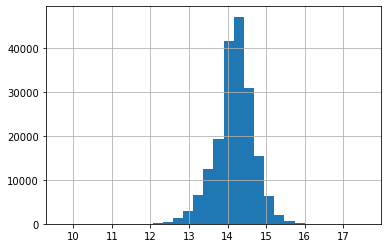

In [31]:
solar_data['efficiency'].hist(bins=30)

In [32]:
from scikit_posthocs import outliers_gesd

In [33]:
outliers = outliers_gesd(solar_data['efficiency'], outliers=50, hypo=True)

In [34]:
solar_data['efficiency'][outliers]

4697     11.399091
9231     11.552637
10905    11.235799
14174    11.631319
14369    11.438085
24969    16.867786
25115    11.647989
29355    10.844418
36609    11.610540
36879    11.024828
41771    11.637119
50650    16.832114
57327    16.692127
58378    11.625542
72037    11.481564
74627     9.691218
75506    11.380095
81010    17.578530
82024    11.320243
90948    11.625866
92290    11.386670
92764    16.802426
97084    10.660656
98484    17.173836
Name: efficiency, dtype: float64

In [35]:
solar_data.shape

(187196, 1)

In [36]:
outliers.sum()

24

## Pearson correlation test

In [37]:
import numpy as np
from scipy.stats import pearsonr

np.random.seed(42)
a = [t + np.random.random()**2*10 for t in np.linspace(1, 100, 10)]
b = [t + np.random.random()**2*10 for t in np.linspace(1, 100, 10)]
c = [np.random.random() for t in range(10)]
print(pearsonr(a, b))
print(pearsonr(a, c))

(0.9983249247436123, 3.4374952899986435e-11)
(-0.11783235599746164, 0.7457908412602139)
